In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a9b2bd96ff89869a0a97ac0535c42bf


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a9b2bd96ff89869a0a97ac0535c42bf&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":54.3,"feels_like":53.91,"temp_min":47.03,"temp_max":60.76,"pressure":1015,"humidity":95},"visibility":3219,"wind":{"speed":4,"deg":81,"gust":11.01},"clouds":{"all":90},"dt":1635183483,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1635160144,"sunset":1635198433},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 54.3,
  'feels_like': 53.91,
  'temp_min': 47.03,
  'temp_max': 60.76,
  'pressure': 1015,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 4, 'deg': 81, 'gust': 11.01},
 'clouds': {'all': 90},
 'dt': 1635183483,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635160144,
  'sunset': 1635198433},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 54.3,
  'feels_like': 53.91,
  'temp_min': 47.03,
  'temp_max': 60.76,
  'pressure': 1015,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 4, 'deg': 81, 'gust': 11.01},
 'clouds': {'all': 90},
 'dt': 1635183483,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635160144,
  'sunset': 1635198433},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1635160144,
 'sunset': 1635198433}

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 60.76 95 90 4


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | sur
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | pinawa
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | imbituba
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | tapanatepec
City not found. Skipping...
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of

City not found. Skipping...
Processing Record 35 of Set 4 | comodoro rivadavia
Processing Record 36 of Set 4 | padang
Processing Record 37 of Set 4 | masuguru
Processing Record 38 of Set 4 | zaozerne
Processing Record 39 of Set 4 | glen avon
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | cortez
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | neyshabur
Processing Record 44 of Set 4 | jega
Processing Record 45 of Set 4 | mackay
Processing Record 46 of Set 4 | sulangan
Processing Record 47 of Set 4 | khasan
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | falkoping
City not found. Skipping...
Processing Record 50 of Set 4 | acajutla
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | punta gorda
Processing Record 6 of Set 5 | half moon bay
Processing Re

Processing Record 26 of Set 8 | atherton
Processing Record 27 of Set 8 | taltal
Processing Record 28 of Set 8 | imeni poliny osipenko
Processing Record 29 of Set 8 | marzuq
Processing Record 30 of Set 8 | mechetinskaya
Processing Record 31 of Set 8 | balgazyn
Processing Record 32 of Set 8 | floriano
Processing Record 33 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 34 of Set 8 | castelldefels
Processing Record 35 of Set 8 | siemiatycze
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | igarka
Processing Record 38 of Set 8 | biltine
Processing Record 39 of Set 8 | tevaitoa
Processing Record 40 of Set 8 | sagauli
Processing Record 41 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 42 of Set 8 | palompon
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | mouzakion
City not found. Skipping...
Processing Record 45 of Set 8 | gejiu
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 8 | nome
Processing

Processing Record 13 of Set 12 | launceston
Processing Record 14 of Set 12 | azimur
City not found. Skipping...
Processing Record 15 of Set 12 | awbari
Processing Record 16 of Set 12 | darhan
Processing Record 17 of Set 12 | mlonggo
Processing Record 18 of Set 12 | boa vista
Processing Record 19 of Set 12 | oda
Processing Record 20 of Set 12 | benguela
Processing Record 21 of Set 12 | beeville
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | oussouye
Processing Record 24 of Set 12 | ulaangom
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | dibaya
City not found. Skipping...
Processing Record 27 of Set 12 | poum
Processing Record 28 of Set 12 | bischwiller
Processing Record 29 of Set 12 | charters towers
Processing Record 30 of Set 12 | severo-yeniseyskiy
Processing Record 31 of Set 12 | hirtshals
Processing Record 32 of Set 12 | okitipupa
Processing Record 33 of Set 12 | kruisfontein
Processing Record 34 of Set 12 | ornskoldsvik
Processi

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila,42.0304,-8.1588,53.33,78,47,2.84,PT,2021-10-25 17:49:22
1,Bluff,-46.6000,168.3333,51.31,93,91,7.09,NZ,2021-10-25 17:41:47
2,Bengkulu,-3.8004,102.2655,74.82,91,100,3.78,ID,2021-10-25 17:42:17
3,Thompson,55.7435,-97.8558,33.96,93,75,2.30,CA,2021-10-25 17:39:41
4,Sur,22.5667,59.5289,81.66,64,0,5.30,OM,2021-10-25 17:49:22
5,Ribeira Grande,38.5167,-28.7000,70.20,73,75,12.66,PT,2021-10-25 17:41:36
6,Mar Del Plata,-38.0023,-57.5575,71.62,37,0,18.01,AR,2021-10-25 17:42:46
7,Pinawa,50.1489,-95.8811,45.43,51,7,10.51,CA,2021-10-25 17:49:23
8,Busselton,-33.6500,115.3333,42.04,71,73,4.38,AU,2021-10-25 17:39:35
9,Victoria,22.2855,114.1577,75.33,82,97,1.01,HK,2021-10-25 17:38:26


In [23]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila,PT,2021-10-25 17:49:22,42.0304,-8.1588,53.33,78,47,2.84
1,Bluff,NZ,2021-10-25 17:41:47,-46.6000,168.3333,51.31,93,91,7.09
2,Bengkulu,ID,2021-10-25 17:42:17,-3.8004,102.2655,74.82,91,100,3.78
3,Thompson,CA,2021-10-25 17:39:41,55.7435,-97.8558,33.96,93,75,2.30
4,Sur,OM,2021-10-25 17:49:22,22.5667,59.5289,81.66,64,0,5.30
...,...,...,...,...,...,...,...,...,...
560,Nalut,LY,2021-10-25 17:44:10,30.3333,10.8500,69.98,35,0,8.68
561,Shubarkuduk,KZ,2021-10-25 17:52:00,49.1447,56.4872,41.72,65,71,14.16
562,Garh Maharaja,PK,2021-10-25 17:52:01,30.8339,71.9053,70.34,35,0,3.62
563,Egvekinot,RU,2021-10-25 17:52:02,66.3167,-179.1667,0.18,88,44,7.67


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

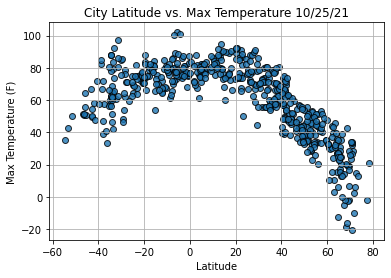

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

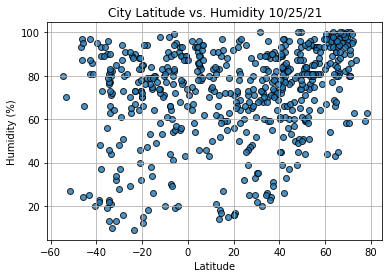

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

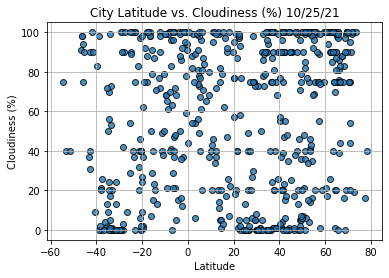

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

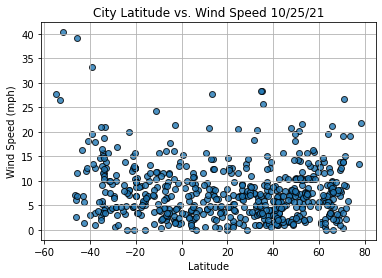

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()